# Домашнее задание "Продвинутая оптимизация".

### Задание

При фиксированном `seed=42` поэкспериментируйте с параметрами алгоритма [differential_evolution](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.differential_evolution.html): strategy, popsize, mutation.

Постройте графики количества итераций (`nit`) оптимизации [функции ackley](https://en.wikipedia.org/wiki/Ackley_function) от значения параметра. 

Подробнее о результате выдачи [тут](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.OptimizeResult.html).

In [1]:
import numpy as np
from scipy.optimize import differential_evolution
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
def ackley(x):
    arg1 = -0.2 * np.sqrt(0.5 * (x[0] ** 2 + x[1] ** 2))
    arg2 = 0.5 * (np.cos(2. * np.pi * x[0]) + np.cos(2. * np.pi * x[1]))
    return -20. * np.exp(arg1) - np.exp(arg2) + 20. + np.e

bounds = [(-10, 10), (-10, 10)]

result = differential_evolution(ackley, bounds, seed=42)
result

 message: Optimization terminated successfully.
 success: True
     fun: 4.440892098500626e-16
       x: [ 0.000e+00  0.000e+00]
     nit: 90
    nfev: 2793

In [118]:
def check_param(parametr, parametr_list, rotation=0):
    nit_list = []
    nfev_list = []
    x_list = []
    x_label = list(map(str, parametr_list))
    for par in parametr_list:
        res = differential_evolution(ackley, bounds, seed=42, **{parametr: par})
        nit_list.append(res.nit)
        nfev_list.append(res.nfev)
        x_list.append('blue' if sum(res.x)< 1e-6 else 'red')
    print(nit_list, nfev_list, x_list)
    fig, ax = plt.subplots()
    ax.bar(x_label, nit_list, color = x_list, alpha=0.5)
    ax.set_xlabel(parametr)
    ax.set_xticklabels(x_label, rotation=rotation)
    ax.set_ylabel('nit')
    ax2 = ax.twinx()
    ax2.bar(x_label, nfev_list, alpha=0.5, color='green')
    ax2.set_ylabel('nfev')
    plt.show()


[5, 28, 38, 47, 57, 76, 91, 104, 137, 138] [192, 933, 1233, 1503, 1803, 2373, 2823, 3213, 4203, 4233] ['red', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue']


/var/folders/yv/y6gd0q0d7k14thdfy7xxxs140000gn/T/ipykernel_38761/1783180630.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_label, rotation=rotation)


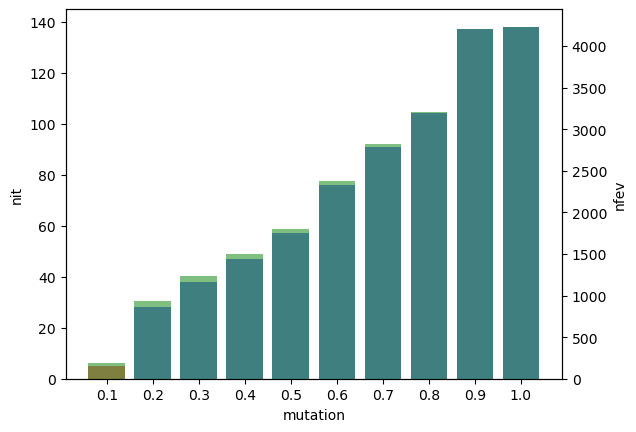

In [117]:
check_param(
    parametr='mutation',
    parametr_list=list(np.round(np.linspace(0.1, 1, 10), 2))
)

[7, 7, 29, 39, 100, 99, 87, 97, 101, 97, 89, 96, 96, 99, 90] [103, 103, 306, 506, 1073, 1263, 1295, 1631, 1899, 2023, 2043, 2391, 2585, 2863, 2793] ['red', 'red', 'blue', 'red', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue']


/var/folders/yv/y6gd0q0d7k14thdfy7xxxs140000gn/T/ipykernel_38761/2950423117.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_label, rotation=rotation)


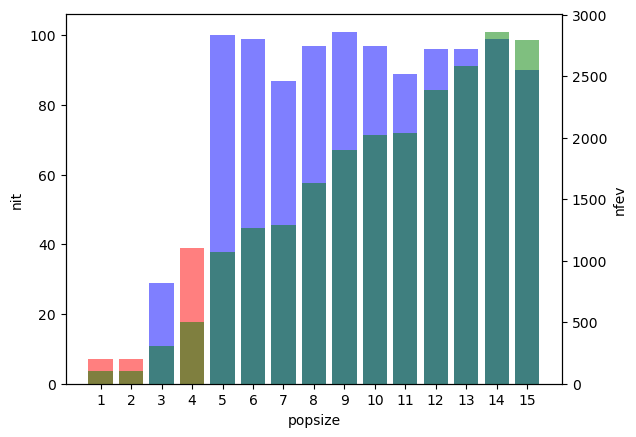

In [114]:
check_param(
    parametr='popsize',
    parametr_list=[x for x in range(1, 16)]
)

[96, 90, 168, 166, 232, 238, 101, 100, 1000, 1000, 169, 166] [2973, 2793, 5133, 5073, 7053, 7233, 3123, 3093, 30093, 30093, 5163, 5073] ['blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue']


/var/folders/yv/y6gd0q0d7k14thdfy7xxxs140000gn/T/ipykernel_38761/2950423117.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_label, rotation=rotation)


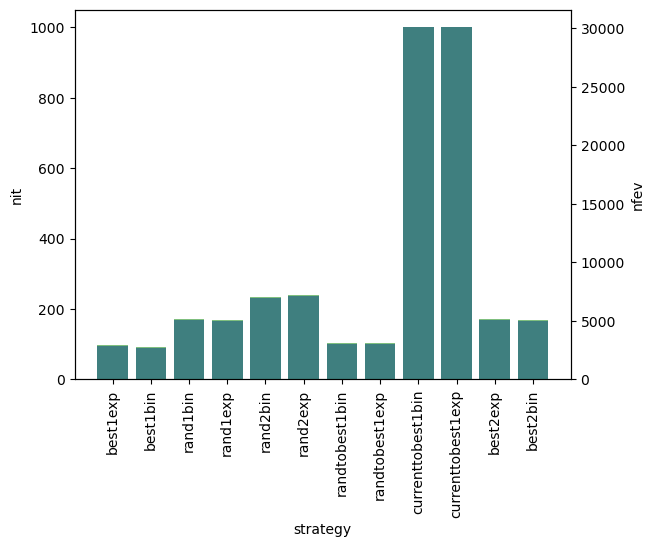

In [115]:
check_param(
    parametr='strategy',
    parametr_list=[
        'best1exp',
        'best1bin',
        'rand1bin',
        'rand1exp',
        'rand2bin',
        'rand2exp',
        'randtobest1bin',
        'randtobest1exp',
        'currenttobest1bin',
        'currenttobest1exp',
        'best2exp',
        'best2bin',
    ],
    rotation=90
)

### Дополнительное задание


Поэкспериментируйте с параметрами и оптимизацией через [minimize](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html):

In [ ]:
from scipy.optimize import minimize

x0 = [0,0]

result_m = minimize(ackley, x0,  method='Nelder-Mead')
result_m

 final_simplex: (array([[ 0.00000000e+00,  0.00000000e+00],
       [-1.60675049e-05, -8.45336914e-06],
       [-1.40380859e-06, -3.11279297e-05]]), array([4.44089210e-16, 5.13604405e-05, 8.81584216e-05]))
           fun: 4.440892098500626e-16
       message: 'Optimization terminated successfully.'
          nfev: 17
           nit: 8
        status: 0
       success: True
             x: array([0., 0.])

In [ ]:
### YOUR CODE HERE

Вы также можете поэкспериментировать с [другими методами оптимизации](https://habr.com/ru/company/prequel/blog/568496/), но это не обязательно для зачета.
